In [106]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

%matplotlib inline

Данные описывают экономические условия в 48 городах мира в 1991 году. \
Данные были собраны отделом экономических исследований банка Union (Швейцария). \
Описаны экономические условия в 48 городах мира в 1991 году.

Число наблюдений: 48 

Названия переменных:
- City (Город): Название города
- Работа (Work): Взвешенное среднее числа рабочих часов, сосчитанное по 12 профессиям
- Цена (Price): Индекс цен 112 товаров и услуг, включая арендную плату за жилье (значение для Цюриха взято за 100%)
- Заработная плата (Salary): Индекс заработной платы за час работы, сосчитанный по 12 профессиям после налогов и вычетов (значение для Цюриха взято за 100%)

In [107]:
# заносим города в индексы для удобства обработки датафрейма
data = pd.read_csv('Econom_Cities_data.csv', sep=';', decimal=',', index_col='City')
data

,Work,Price,Salary
City,,,
Amsterdam,1714,65.6,49.0
Athens,1792,53.8,30.4
Bogota,2152,37.9,11.5
Bombay,2052,30.3,5.3
Brussels,1708,73.8,50.5
Buenos_Aires,1971,56.1,12.5
Cairo,-9999,37.1,-9999.0
Caracas,2041,61.0,10.9
Chicago,1924,73.9,61.9


В данных присутствуют явные выбросы, это города `Cairo` и `Jakarta`. Можно было бы заменить их значения средним или медианой, или же данными похожих городов по индексу цен, но данных слишком мало, поэтому я предпочту не учитывать эти города.

In [108]:
data = data.drop(index=['Cairo', 'Jakarta'])

Из описательных статистик можно увидеть, что данные имеют разный размах, поэтому мы будем вынуждены стандиртизировать их для последующего анализа. Также существуют города, где уровень заработка (`Salary`) в десятки раз меньше чем в Цюрихе.

In [109]:
data.describe()

,Work,Price,Salary
count,46.000000,46.000000,46.000000
mean,1879.913043,70.100000,39.545652
std,174.342552,21.389177,24.757703
min,1583.000000,30.300000,2.700000
25%,1745.250000,51.775000,14.375000
50%,1849.000000,70.950000,43.650000
75%,1976.250000,81.900000,59.700000
max,2375.000000,115.500000,100.000000


Построив матрицу корреляции, можно увидеть, что уровень дохода и индекс цен хорошо коррелируют. Чем больше цены в городе, тем больше работадатели должны платить своим работникам. Это знание можно использовать для уменьшения размерности при визуализации данных.

Существует отрицательная корреляция между количеством рабочих часов и зарплаты в час. Складывается такая тенденция, что человек вынужден много работать чтобы компенсировать низкую оплату труда. И чем выше зарплата, тем меньше человек должен работать чтобы поддерживать необходимый уровень жизни.

In [110]:
data.corr()

,Work,Price,Salary
Work,1.000000,-0.452176,-0.457187
Price,-0.452176,1.000000,0.803825
Salary,-0.457187,0.803825,1.000000


Стандартизируем данные

In [111]:
scaled = StandardScaler().fit_transform(data)
scaled = pd.DataFrame(scaled, columns = data.columns)
scaled.head()

,Work,Price,Salary
0,-0.962166,-0.212712,0.386095
1,-0.509827,-0.770489,-0.373488
2,1.577891,-1.522069,-1.145323
3,0.997969,-1.881316,-1.398517
4,-0.996961,0.174896,0.447351


Функция помогает отобразить наши данные на трехмерной плоскости. Хотя как мы выяснили выше, можно избавиться от одной из размерносте для отображения на двухмерной плоскости.

In [112]:
def show_data(df):
    standart_data = StandardScaler().fit_transform(df)
    X = standart_data[:, 1]
    Y = standart_data[:, 2]
    Z = standart_data[:, 0]
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')



    for x, y, z in [(X, Y, Z)]:
        ax.scatter(x, y, z, marker='o')

    ax.set_xlabel('Price')
    ax.set_ylabel('Salary')
    ax.set_zlabel('Work')

    plt.show()  

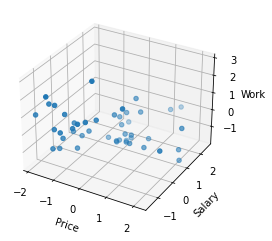

In [113]:
show_data(data)

# Иерархический кластерный анализ

In [114]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [115]:
link = linkage(data, 'ward')

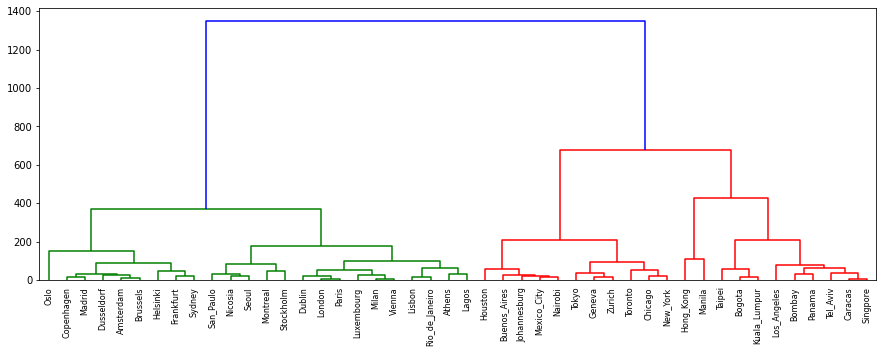

In [116]:
plt.figure(figsize=(15, 5))
dn = dendrogram(link, labels=data.index)

Определим оптимальное количество кластеров методом каменистой осыпи.

In [117]:
dist = link[:, 2]
dist

array([   6.29285309,    7.47328576,    8.30662386,   10.27083249,
         14.69353599,   14.80033783,   14.8882504 ,   15.96558799,
         16.09099127,   20.163829  ,   20.40882162,   20.67776584,
         22.59063228,   23.42313671,   25.94609797,   26.09323028,
         28.46565182,   29.61840644,   33.24845861,   33.91532594,
         34.64582707,   34.74977218,   37.66209412,   47.60640713,
         49.63903034,   53.09215259,   53.2601477 ,   59.14997887,
         59.75115062,   61.62665819,   64.18000727,   78.56235316,
         82.14480304,   91.71954899,   96.76433572,  101.59464061,
        112.16897967,  150.62995681,  175.82934909,  210.62902402,
        210.96355925,  370.62286619,  429.09318618,  679.88286023,
       1346.80219964])

Text(0, 0.5, 'Расстояние')

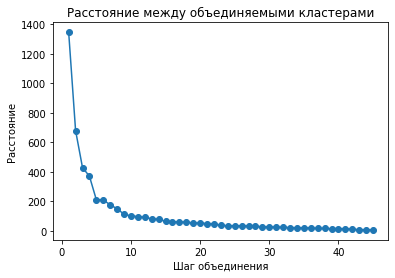

In [118]:
dist_rev = dist[::-1]
idxs = range(1, len(dist) + 1)
plt.plot(idxs, dist_rev, marker='o')
plt.title('Расстояние между объединяемыми кластерами')
plt.xlabel('Шаг объединения')
plt.ylabel('Расстояние')

Разобьём данные на 5 кластера. Отнимем от присваемого номера кластера 1 чтобы нумерация начиналась с 0, так как остальные модели будут выдавать именно такую нумерацию.

Скопируем исходные данные и запишем присвоенные кластеры для последующего сравнения нескольких результатов кластеризации.

In [119]:
data1 = data.copy()
data1['cluster'] = fcluster(link, 300, criterion='distance') - 1
data1.head()

,Work,Price,Salary,cluster
City,,,,
Amsterdam,1714,65.6,49.0,0
Athens,1792,53.8,30.4,1
Bogota,2152,37.9,11.5,4
Bombay,2052,30.3,5.3,4
Brussels,1708,73.8,50.5,0


Функция позволяет отобразить данные в трехмерном пространстве и отделить кластеры друг от друга разными цветами.

In [120]:
def show_clusters(df):
    standart_data = StandardScaler().fit_transform(df.iloc[: , :3])
    X = standart_data[:, 0]
    Y = standart_data[:, 1]
    Z = standart_data[:, 2]
    
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    marker_dict = {-1: "x", 0 : "D", 1 : 'o', 2 : 's', 3 : '*', 4 : "p"}
    color_dict = {-1: "black", 0 : 'yellow', 1 : 'blue', 2 : 'white', 3 : 'red', 4 : "green"}
    
    
    
    for x, y, z, cluster in zip(X, Y, Z, list(df.cluster)):
        ax.scatter(x, y, z, c=color_dict[cluster], marker=marker_dict[cluster], alpha=0.7, edgecolors='black')

    ax.set_xlabel('Work')
    ax.set_ylabel('Price')
    ax.set_zlabel('Salary')
    
    plt.show()  

##### Исходные кластеры можно разделить на 5 условных групп: 

- малая группа городов, где количество рабочих часов существенно меньше медианного и уровень дохода удовлетворительный
- большая группа городов, где количество рабочих часов меньше медианного, но уровень дохода достаточный
- средние, переходные города, где количество рабочих часов на уровне медианного, но уровень дохода достаточный
- города, где люди работают больше среднего, но получают невысокую плату в час
- Города, где люди работают очень много и их труд плохо оплачивается


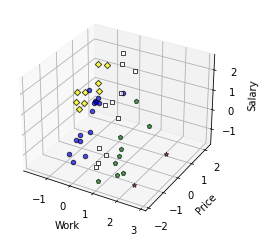

In [121]:
show_clusters(data1)

На данном графике лучше видно разделение данных на кластеры

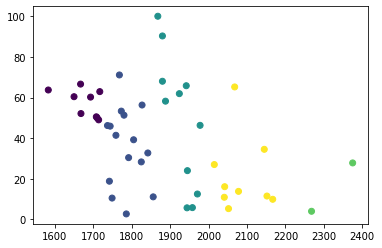

In [122]:
plt.scatter(data1.Work, data1.Salary, c=data1.cluster)

Напишем функцию, которая будет делать выборку из представителей каждого кластера.

In [123]:
def show_cities_from_clasters(df):
    #находим количество кластеров в датафрейме
    clusters_range = range(max(np.unique(data1.cluster)) + 1)
    # пробегаемся по каждому кластеру
    for cluster in clusters_range:
        # создаем фильтр для нужного кластера
        df_filter = df.cluster == cluster
        # находим половину от размера кластеры, округляя в большую сторону
        half_of_df = (df[df_filter].shape[0] // 2) + 1
        # выводим половину наблюдений из нужного кластера
        print(df[df_filter].iloc[: half_of_df])

In [124]:
show_cities_from_clasters(data1)

            Work  Price  Salary  cluster
City                                    
Amsterdam   1714   65.6    49.0        0
Brussels    1708   73.8    50.5        0
Copenhagen  1717   91.3    62.9        0
Dusseldorf  1693   78.5    60.2        0
Frankfurt   1650   74.5    60.4        0
            Work  Price  Salary  cluster
City                                    
Athens      1792   53.8    30.4        1
Dublin      1759   76.0    41.4        1
Lagos       1786   45.2     2.7        1
Lisbon      1742   56.2    18.8        1
London      1737   84.2    46.2        1
Luxembourg  1768   71.1    71.1        1
Milan       1773   82.0    53.3        1
Montreal    1827   72.7    56.3        1
              Work  Price  Salary  cluster
City                                      
Buenos_Aires  1971   56.1    12.5        2
Chicago       1924   73.9    61.9        2
Geneva        1880   95.9    90.3        2
Houston       1978   71.9    46.3        2
Johannesburg  1945   51.1    24.0        2
Me

##### Можно сделать следующие выводы по кластерам, основываясь на включенные в них города: 

- 0 кластер : Города малых развитых европейских стран с хорошо оплачиваемым трудом
- 1 кластер : Города более крупных европейских стран, с большим населением. Размер оплаты труда отличается в меньшую сторону по сравнению с 0 кластером.
- 2 кластер : Встречаются города за пределами европы. Как правило это одни из групнейших и густонаселенных городов страны. Если город находится в развитой стране, то оплата труда высокая, если в развивающийся, то низкая.
- 3 кластер : Густонаселенные портовые города, связанные с международной торговлей. Как следствие, экономическое развитие и цены в городах высокие, но оплата труда одна из самых низких из-за низкоквалифицированного труда.
- 4 кластер : Города развивающихся стран азии и южной америки

In [125]:
data1.groupby('cluster').mean()

,Work,Price,Salary
cluster,,,
0,1678.888889,86.377778,57.266667
1,1785.666667,67.566667,35.946667
2,1925.272727,73.836364,48.954545
3,2321.500000,51.900000,15.900000
4,2084.444444,57.522222,21.577778


Распределение по кластерам неравномерное, что вполне объяснимо. Большая часть современных городов хорошо экономически развиты, а количество рабочих часов в них строго регулируется законом.

In [126]:
data1.groupby('cluster').size()

cluster
0     9
1    15
2    11
3     2
4     9
dtype: int64

# Кластерный анализ методом к-средних (k-means)

In [127]:
from sklearn.cluster import KMeans

Определим оптимальное количество кластеров методом каменистой осыпи.

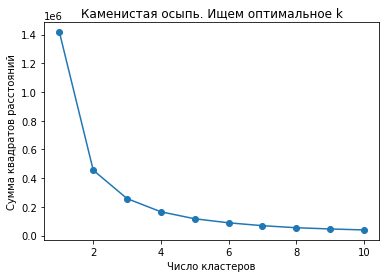

In [128]:
K = range(1, 11)

# Вычисляем значения критерия качества для разного числа кластеров
models = [KMeans(n_clusters=k, random_state=42).fit(data) for k in K]
dist = [model.inertia_ for model in models]

# Строим график каменистая осыпь
plt.plot(K, dist, marker='o')
plt.xlabel('Число кластеров')
plt.ylabel('Сумма квадратов расстояний')
plt.title('Каменистая осыпь. Ищем оптимальное k')
plt.show()

Перелом образовался примерно при 3 кластерах.

Обучаем модель на 3 кластерах и смотрим результаты

In [129]:
clf = KMeans(n_clusters=3, random_state=42)
clf.fit(data)

KMeans(n_clusters=3, random_state=42)

In [130]:
data2 = data.copy()
data2['cluster'] = clf.labels_
data2.head()

,Work,Price,Salary,cluster
City,,,,
Amsterdam,1714,65.6,49.0,2
Athens,1792,53.8,30.4,2
Bogota,2152,37.9,11.5,1
Bombay,2052,30.3,5.3,1
Brussels,1708,73.8,50.5,2


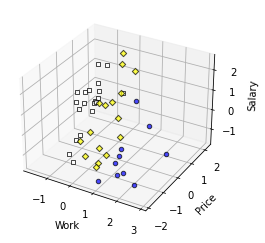

In [131]:
show_clusters(data2)

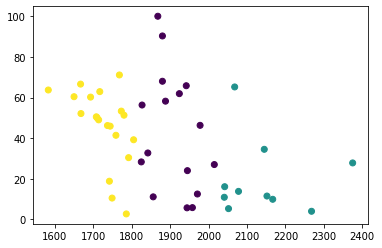

In [132]:
plt.scatter(data2.Work, data2.Salary, c=data2.cluster)

In [133]:
show_cities_from_clasters(data2)

              Work  Price  Salary  cluster
City                                      
Buenos_Aires  1971   56.1    12.5        0
Chicago       1924   73.9    61.9        0
Geneva        1880   95.9    90.3        0
Houston       1978   71.9    46.3        0
Johannesburg  1945   51.1    24.0        0
Mexico_City   1944   49.8     5.7        0
Montreal      1827   72.7    56.3        0
Nairobi       1958   45.0     5.8        0
New_York      1942   83.3    65.8        0
              Work  Price  Salary  cluster
City                                      
Bogota        2152   37.9    11.5        1
Bombay        2052   30.3     5.3        1
Caracas       2041   61.0    10.9        1
Hong_Kong     2375   63.8    27.8        1
Kuala_Lumpur  2167   43.5     9.9        1
Los_Angeles   2068   79.8    65.2        1
            Work  Price  Salary  cluster
City                                    
Amsterdam   1714   65.6    49.0        2
Athens      1792   53.8    30.4        2
Brussels    1708   

##### Можно сделать следующие выводы по кластерам, основываясь на включенные в них города: 

- 0 кластер : Как правило, города за пределами европы. Крупнейше и густонаселенные города страны. Если город находится в развитой стране, то оплата труда высокая, если в развивающийся, то низкая.
- 1 кластер : Крупные финансовые центры азиатских и южноафриканских стран. Имеют большое население и низкую оплату труда
- 2 кластер : Столицы евпропейских городов или развитых стран с высоким уровнем дохода и малым количеством рабочих часов.

In [134]:
data2.groupby('cluster').mean()

,Work,Price,Salary
cluster,,,
0,1908.9375,69.20625,43.36875
1,2138.8000,55.42000,19.90000
2,1727.2500,78.15500,46.31000


По сравнению с иерархическим кластерным анализом, метод k-means формирует кластеры с относительно равным поличеством объектов.

In [135]:
data2.groupby('cluster').size()

cluster
0    16
1    10
2    20
dtype: int64

Стоить отметить, что при выборе 4 кластеров модель не отделяет наши обособленные данные в отдельную малую группу, она предпочитает делать кластеры более сбалансироваными по количеству объектов.

Counter({2: 14, 0: 14, 3: 5, 1: 13})

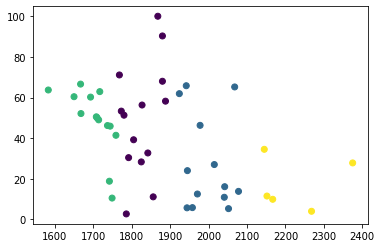

In [136]:
from collections import Counter

four_clusters_model = KMeans(n_clusters=4, random_state=42).fit(data)

plt.scatter(data2.Work, data2.Salary, c=four_clusters_model.labels_)
Counter(four_clusters_model.labels_)

# Кластерный анализ методом DBSCAN

In [137]:
from sklearn.cluster import DBSCAN

Подбираем оптимальные значения параметров. Главное требование: наибольшее количество различимых кластеров и уменьшить количество данных, считающихся выбросами.


In [138]:
eps_array = np.arange(0.2, 1.2, 0.2)
leaf_size_array = np.arange(2, 12, 2)
eps_array, leaf_size_array

(array([0.2, 0.4, 0.6, 0.8, 1. ]), array([ 2,  4,  6,  8, 10]))

In [140]:
params = []
clasters = []
composition_of_clusters = []

for eps in eps_array:
    for leaf_size in leaf_size_array:
        clustering = DBSCAN(eps=eps, leaf_size=leaf_size)
        clustering.fit(scaled)
        unique, counts = np.unique(clustering.labels_, return_counts=True)
        params.append(f'eps={eps.round(1)}, leaf_size={leaf_size}')
        clasters.append(len(unique))
        composition_of_clusters.append(counts)

dat = {'params': params, 'clasters': clasters, 'composition_of_clusters' : composition_of_clusters}
dat = pd.DataFrame.from_dict(dat)
dat

,params,clasters,composition_of_clusters
0,"eps=0.2, leaf_size=2",1,[46]
1,"eps=0.2, leaf_size=4",1,[46]
2,"eps=0.2, leaf_size=6",1,[46]
3,"eps=0.2, leaf_size=8",1,[46]
4,"eps=0.2, leaf_size=10",1,[46]
5,"eps=0.4, leaf_size=2",2,"[41, 5]"
6,"eps=0.4, leaf_size=4",2,"[41, 5]"
7,"eps=0.4, leaf_size=6",2,"[41, 5]"
8,"eps=0.4, leaf_size=8",2,"[41, 5]"
9,"eps=0.4, leaf_size=10",2,"[41, 5]"


Минимальное количество кластеров, которые нас удовлетворяет, это 3. Так как один из кластеров считается выбросами и его нельзя интерпретировать. Пройдёмся более детально по параметрам, которые нам дают 3 кластера. Возможно мы обнаружим ещё 4 кластер.

In [173]:
eps_array = np.arange(0.6, 1, 0.1)
leaf_size_array = np.arange(2, 10, 1)
eps_array, leaf_size_array

(array([0.6, 0.7, 0.8, 0.9]), array([2, 3, 4, 5, 6, 7, 8, 9]))

In [174]:
params = []
clasters = []
composition_of_clusters = []

for eps in eps_array:
    for leaf_size in leaf_size_array:
        clustering = DBSCAN(eps=eps, leaf_size=leaf_size)
        clustering.fit(scaled)
        unique, counts = np.unique(clustering.labels_, return_counts=True)
        params.append(f'eps={eps.round(1)}, leaf_size={leaf_size}')
        clasters.append(len(unique))
        composition_of_clusters.append(counts)

dat = {'params': params, 'clasters': clasters, 'composition_of_clusters' : composition_of_clusters}
dat = pd.DataFrame.from_dict(dat)
dat

,params,clasters,composition_of_clusters
0,"eps=0.6, leaf_size=2",3,"[28, 12, 6]"
1,"eps=0.6, leaf_size=3",3,"[28, 12, 6]"
2,"eps=0.6, leaf_size=4",3,"[28, 12, 6]"
3,"eps=0.6, leaf_size=5",3,"[28, 12, 6]"
4,"eps=0.6, leaf_size=6",3,"[28, 12, 6]"
5,"eps=0.6, leaf_size=7",3,"[28, 12, 6]"
6,"eps=0.6, leaf_size=8",3,"[28, 12, 6]"
7,"eps=0.6, leaf_size=9",3,"[28, 12, 6]"
8,"eps=0.7, leaf_size=2",4,"[21, 16, 6, 3]"
9,"eps=0.7, leaf_size=3",4,"[21, 16, 6, 3]"


Действительно, мы смогли обнаружить 4 кластера. Но результаты такого разделения весьма печальный: почти половину наблюдений алгоритм не стал включать в какие-либо кластеры. Поэтому можно остановиться на 3 кластерах и параметрах, которые дают нам наиболее объяснение данных.

eps=0.9, leaf_size=2

In [162]:
clustering = DBSCAN(eps=0.9, leaf_size=2)
clustering.fit(scaled)

DBSCAN(eps=0.9, leaf_size=2)

In [163]:
unique, counts = np.unique(clustering.labels_, return_counts=True)
print(np.asarray((unique, counts)).T)

[[-1  8]
 [ 0 19]
 [ 1 19]]


In [164]:
data3 = data.copy()
data3['cluster'] = clustering.labels_ 
data3.head()

,Work,Price,Salary,cluster
City,,,,
Amsterdam,1714,65.6,49.0,0
Athens,1792,53.8,30.4,1
Bogota,2152,37.9,11.5,1
Bombay,2052,30.3,5.3,1
Brussels,1708,73.8,50.5,0


Черными крестами обозначены города, которые DBSCAN не включил в кластеры

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  from ipykernel import kernelapp as app


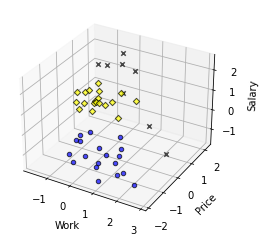

In [165]:
show_clusters(data3)

Как видно из рисунка, главным критерием для включения города в кластер алгоритм посчитал уровень дохода: выше или ниже среднего.

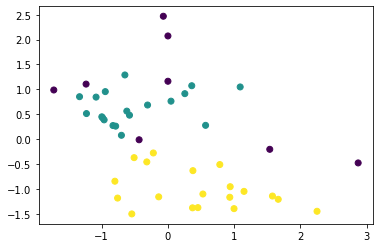

In [166]:
plt.scatter(scaled.Work, scaled.Salary, c=data3.cluster)

In [167]:
data3.cluster = data3.cluster + 1

In [168]:
show_cities_from_clasters(data3)

           Work  Price  Salary  cluster
City                                   
Geneva     1880   95.9    90.3        0
Helsinki   1667  113.6    66.6        0
Hong_Kong  2375   63.8    27.8        0
Oslo       1583  115.5    63.7        0
Stockholm  1805  111.3    39.2        0
             Work  Price  Salary  cluster
City                                     
Amsterdam    1714   65.6    49.0        1
Brussels     1708   73.8    50.5        1
Chicago      1924   73.9    61.9        1
Copenhagen   1717   91.3    62.9        1
Dublin       1759   76.0    41.4        1
Dusseldorf   1693   78.5    60.2        1
Frankfurt    1650   74.5    60.4        1
Houston      1978   71.9    46.3        1
London       1737   84.2    46.2        1
Los_Angeles  2068   79.8    65.2        1
              Work  Price  Salary  cluster
City                                      
Athens        1792   53.8    30.4        2
Bogota        2152   37.9    11.5        2
Bombay        2052   30.3     5.3        2
B

##### Можно сделать следующие выводы по кластерам, основываясь на включенные в них города: 

- 0 кластер : Быстро развивающиеся города, принадлежность к кластеру которых сложно определить. Их показатели значительно отличаются от средних. 
- 1 кластер : Развитые европейские и американские города, с высоким уровнем жизни и оплаты труда
- 2 кластер : Развивающиеся города азии, африки и южной америки, где оплата труда низкая

Медиана для кластеров подтвердило наши предположения. Медианная почасовая оплата труда между кластерами различается в 5 раз, что является статистически значимым отличием.

In [169]:
data3.groupby('cluster').median()

,Work,Price,Salary
cluster,,,
0,1874,105.65,65.15
1,1759,76.00,53.30
2,1958,49.20,11.50


In [170]:
data3.groupby('cluster').size()

cluster
0     8
1    19
2    19
dtype: int64

# Выводы

На рисунке ниже отображено разбиение данных на кластеры для каждого из методов.

Стоит отметить следующее:  
- Иерархический анализ может собирать отдельные подозрительные данные, но только если они образуют отдельную группу. Этот метод требует детального изучения данных, так как результат кластеризации зависит от выбора расстояния между каждый кластером.
- K-means быстрый и не требует большого вмешательства в его работу. Но при малом количества кластеров алгоритм объединяется не совсем схожие данные и различие кластером становится менее заметно.
- DBSCAN требует оптимального подбора параметров, которые гарантируют интерпретируемый результат кластеризации. Этот метод хорошо отделяет специфические данные, которые могут не отображать свойства генеральной совокупности. В результате получаются хорошо различимые кластеры, которые легко интерпретировать.


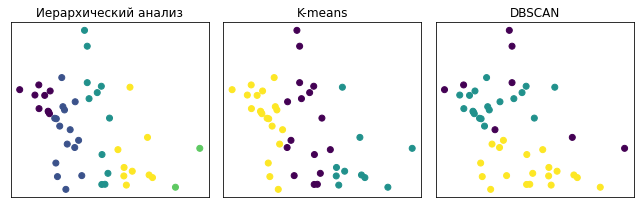

In [171]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(9, 3),
                        subplot_kw={'xticks': [], 'yticks': []})

for ax, data, title  in zip(axs.flat, [data1, data2, data3], ['Иерархический анализ', 'K-means', 'DBSCAN']):
    ax.scatter(data.Work, data.Salary, c=data.cluster)
    ax.set_title(title)

plt.tight_layout()
plt.show()

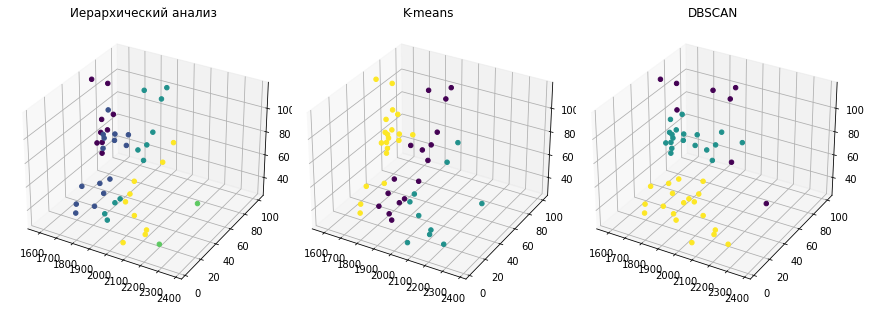

In [172]:
fig = plt.figure()
fig.set_size_inches(12, 18)

for i, data, title  in zip(range(1,4), [data1, data2, data3], ['Иерархический анализ', 'K-means', 'DBSCAN']):
    ax = fig.add_subplot(1, 3, i, projection='3d')
    ax.scatter(data.Work, data.Salary, data.Price, c=data.cluster, alpha=1)
    ax.set_title(title)
    
plt.tight_layout()
plt.show()